## Q* Learning com FrozenLake 4x4

Neste Notebook, implementaremos um agente <b>que reproduz o desafio FrozenLake.</b>

![texto alternativo](http://simoninithomas.com/drlc/Qlearning/frozenlake4x4.png)

O objetivo deste jogo é <b>passar do estado inicial (S) para o estado objetivo (G)</b> andando apenas sobre peças congeladas (F) e evitando buracos (H). No entanto, o gelo é escorregadio, **então você nem sempre se moverá na direção pretendida (ambiente estocástico)**

## Etapa 1: Instalando as dependências no Google Colab

In [17]:
!pip install numpy
!pip install gym==0.25.2
!pip install gym-toytext
!pip install pygame

DEPRECATION: Loading egg at c:\program files\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: Loading egg at c:\program files\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached gym-0.26.2-py3-none-any.whl
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2


DEPRECATION: Loading egg at c:\program files\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: Loading egg at c:\program files\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
#Importando dependências
import numpy as np
import gym
import random

## Passo 1: Criando o ambiente 🎮

- Aqui criaremos o ambiente FrozenLake 8x8.
- OpenAI Gym é uma biblioteca <b> composta por diversos ambientes que podemos usar para treinar nossos agentes.</b>
- No nosso caso optamos por usar Frozen Lake.

In [19]:
#Criando o ambiente   
env = gym.make("FrozenLake-v1")

c:\Program Files\Python312\Lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Program Files\Python312\Lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


## Etapa 2: Criando a tabela Q e inicializando-a

- Agora, vamos criar nossa Q-table, para saber de quantas linhas (estados) e colunas (ações) precisamos, precisamos calcular o action_size e o state_size
- OpenAI Gym nos fornece uma maneira de fazer isso: `env.action_space.n` e `env.observation_space.n`

In [20]:
#Q-Learning - Instanciar a Q Table
action_size = env.action_space.n # Define ações possíveis do ambiente (neste caso discreto de 4 ações: cima, baixo, leste, oeste)
print(f"Ações possíveis no ambiente: {action_size}\n")

state_size = env.observation_space.n # Define quantidade possível de estados
print(f"Quantidade possível de estados: {state_size}")

Ações possíveis no ambiente: 4

Quantidade possível de estados: 16


#### A tabela Q é onde ocorre o aprendizado. 
- É como se jogassemos um jogo com todas as dicas, neste caso, elas estão armazenadas na tabela Q.
- Matriz de qualidade

In [21]:
# Criando a Q-Table, definindo os estados nas linhas e ações nas colunas (64x4)
qtable = np.zeros((state_size, action_size))
print(qtable)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


## Passo 3: Definindo hiperparâmetros

- Taxa de aprendizado: Taxas muito altas podem influir em agentes que não aprendem muito bem, e em taxas muito baixas o agente pode demorar para resolver determinado problema

In [22]:
total_episodes = 500000 # Número de decisões a serem tomadas para buscar encontrar a melhor ação
learning_rate = 0.7 # Taxa de aprendizado
max_steps = 99 # Número de ações possíveis até o critério de parada do algoritmo (episódio)
gamma = 0.95 # Taxa de desconto (Utilizado na função da Q-Table). É tomada como parte da decisão sobre explorar/não explorar

# Exploração e explortação

epsilon = 1.0 # taxa de exploração (favorece a exploração)
max_epsilon = 1.0 # probabilidade de taxa de exploração no início
min_epsilon = 0.01 # taxa mínima de exploração
decay_rate = 0.005 # taxa de decaimento: decisão se continua explorando ou para de explorar e começa a lidar com a aprendizagem anterior

##### A cada episódio novo aplicamos uma taxa de decaimento, logo o epsilon (possibilidade de explorar) vai reduzindo, até que em algum momento não faça mais sentido explorar.

## Passo 4: Algoritmo de aprendizagem Q

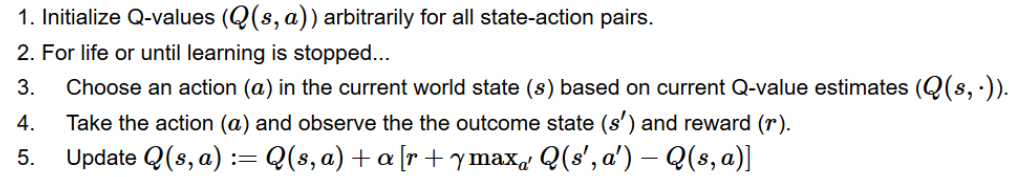

In [23]:
# Criando uma lista de recompensa para cada episódio de aprendizado 
rewards = []

# 2 For life or until learning is stopped
for episode in range(total_episodes):
    state = env.reset() # boa prática -> resetar o ambiente
    step = 0
    done = False # define se parte ou não do objetivo
    total_rewards = 0 # total de recompensas inicial -> podemos decidir se o agente já inicia ou não com alguma pontuação

    for step in range(max_steps):
        # escolher uma ação no estado inicial (state)
        # randomizar um número 
        exp_exp_tradeoff = random.uniform(0, 1)

        # toda vez que o número gerado for > epsilon => explora
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])

        # se o epsilon for maior, ele faz uma escolha aleatória
        else:
            action = env.action_space.sample()

        # Verificar ação e observar a saída (s) e uma recompensa (r)
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # qtable[new_state,:] : all the actions we can take from new state
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])

        # armazena as recompensas
        total_rewards += reward

        # novo estado do agente
        state = new_state

        # If done (if we're dead) : finish episode
        if done == True:
            break

    # Redução do epsilon (quero indicar para o algoritmo que aos poucos devemos reduzir a exploração)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    rewards.append(total_rewards)

# Média de pontuação geral por episódio (há episódios com mais ou menos, mas aqui pegando umas média geral)
print ("Pontuação no tempo: " +  str(sum(rewards)/total_episodes))
print(qtable)

c:\Program Files\Python312\Lib\site-packages\gym\utils\passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Pontuação no tempo: 0.465326
[[9.35742131e-02 9.31011786e-02 9.37096658e-02 9.17156547e-02]
 [9.86487709e-03 9.88226626e-03 1.84917813e-02 8.19869922e-02]
 [2.55075111e-02 2.62754085e-02 6.49092707e-03 2.86863235e-02]
 [8.56600341e-04 1.09680023e-03 4.40936324e-03 9.68056399e-02]
 [2.03773167e-01 2.13690497e-03 3.79163417e-04 1.39309089e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.48106521e-03 1.08775848e-05 2.11432034e-04 1.96125444e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.03184504e-02 8.35984046e-02 6.34330098e-02 2.86056106e-01]
 [5.35705576e-02 1.96593815e-01 5.52576580e-02 1.76630783e-01]
 [3.05470935e-01 9.77933221e-02 2.04684791e-02 6.63059347e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.54018189e-02 1.21702794e-01 3.69196507e-01 2.31795945e-02]
 [1.20168028e-01 8.09000338e-01 2.23868133e-01 3.18596166e-01]
 [0.00000000e+00 0.0000000

## Passo 5: Usando nossa tabela Q para jogar FrozenLake! 👾

- Após 10.000 episódios, nossa tabela Q pode ser usada como uma "folha de dicas" para jogar FrozenLake"
- Ao executar este celular você poderá ver nosso agente jogando FrozenLake.

In [24]:
env.reset()

for episode in range(5):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODIO ", episode)

    for step in range(max_steps):

        # Tome a ação (índice) que tem a recompensa futura máxima esperada dado esse estado
        action = np.argmax(qtable[state,:])

        new_state, reward, done, info = env.step(action)

        if done:
            # Aqui, decidimos imprimir apenas o último estado (para ver se nosso agente está no gol ou caiu em algum buraco)
            env.render()
            if new_state == 15:
                print("Chegamos no Objetivo 🏆")
            else:
                print("Caímos em um Obstáculo ☠️")

            # Printamos o número de passos
            print("Número de passos", step)

            break
        state = new_state
env.close()

****************************************************
EPISODIO  0
****************************************************
EPISODIO  1
Caímos em um Obstáculo ☠️
Número de passos 22
****************************************************
EPISODIO  2
****************************************************
EPISODIO  3
****************************************************
EPISODIO  4
Caímos em um Obstáculo ☠️
Número de passos 18


#### <b>Recompensa </b>

- Meta = 1
- Furo = 0
- Congelado = 0